In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

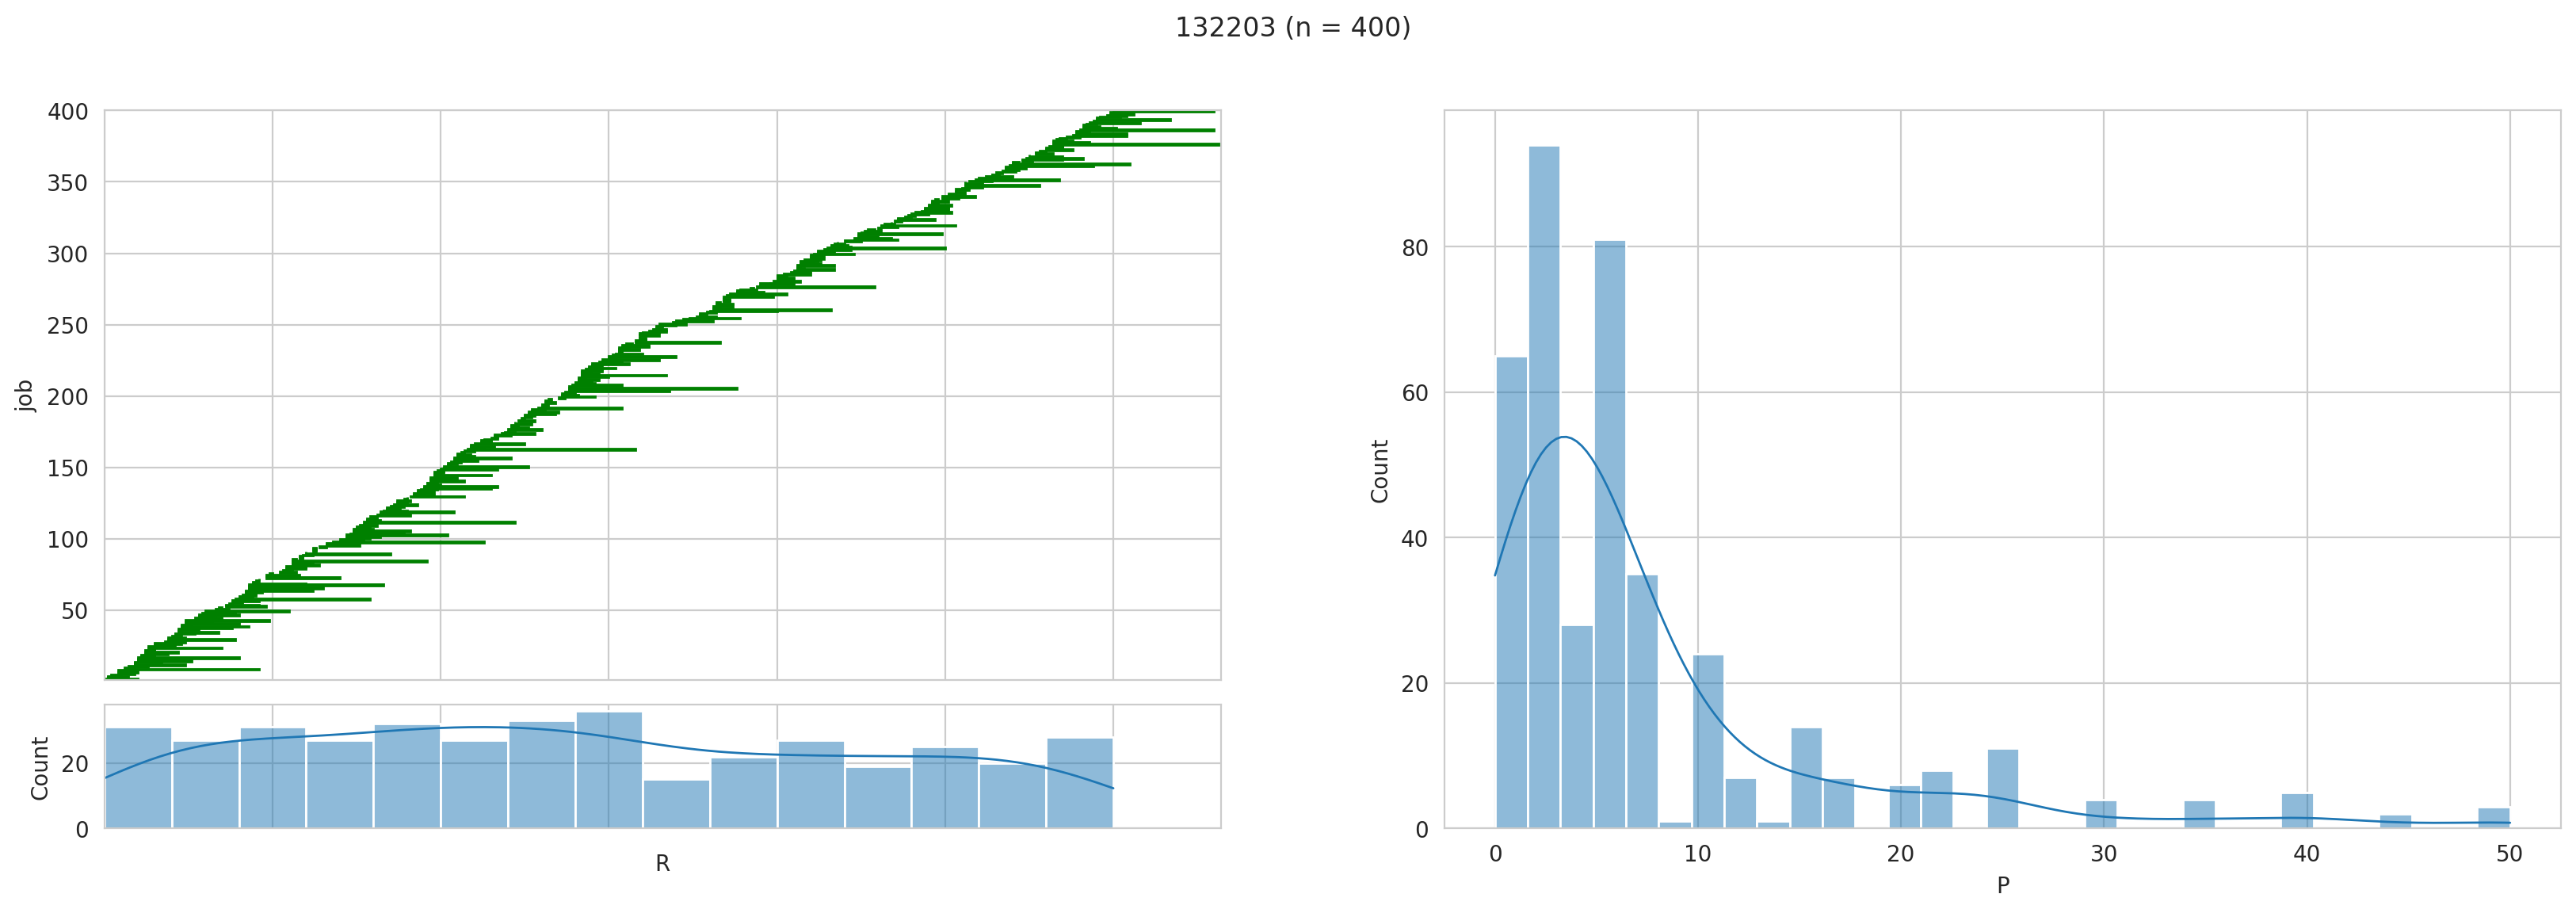

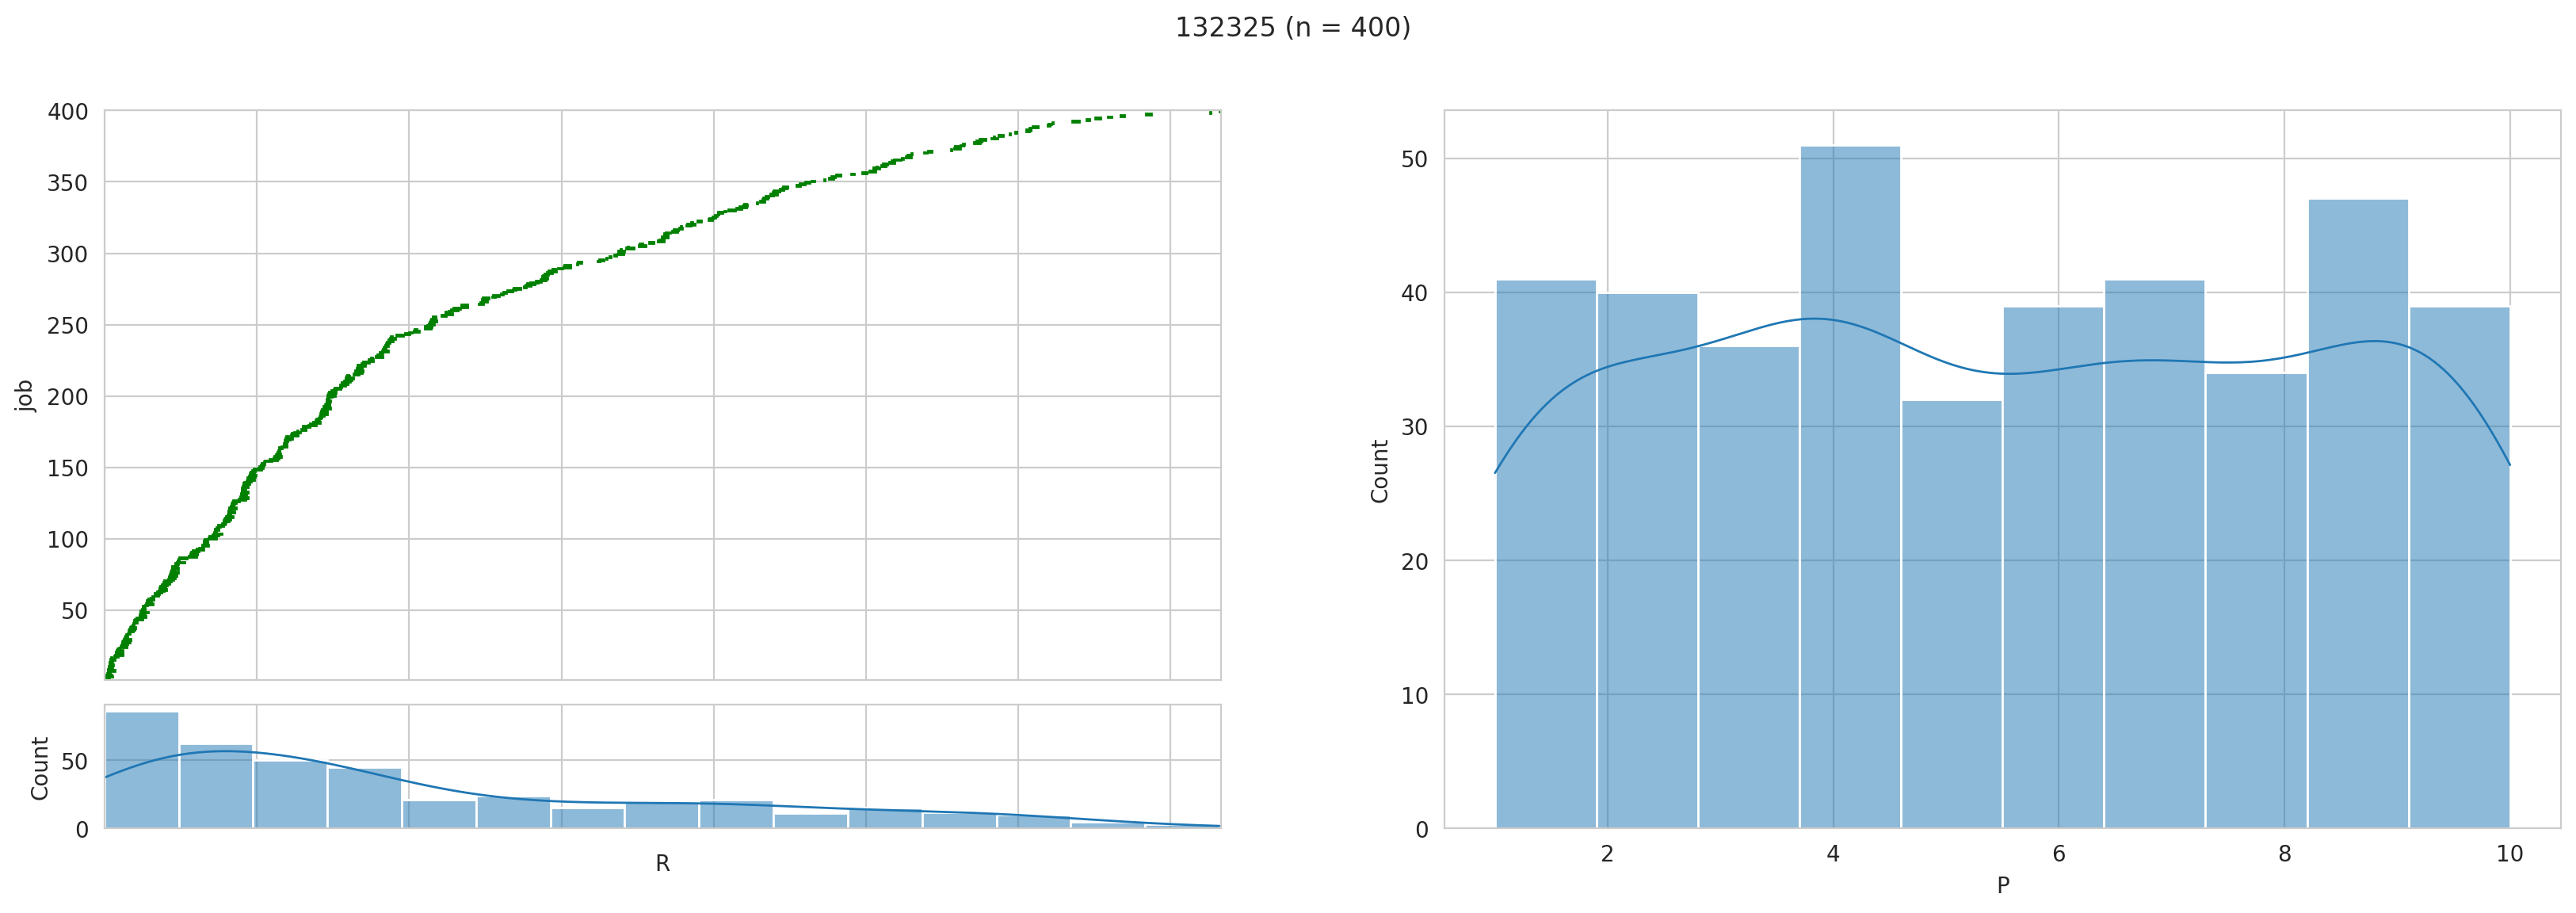

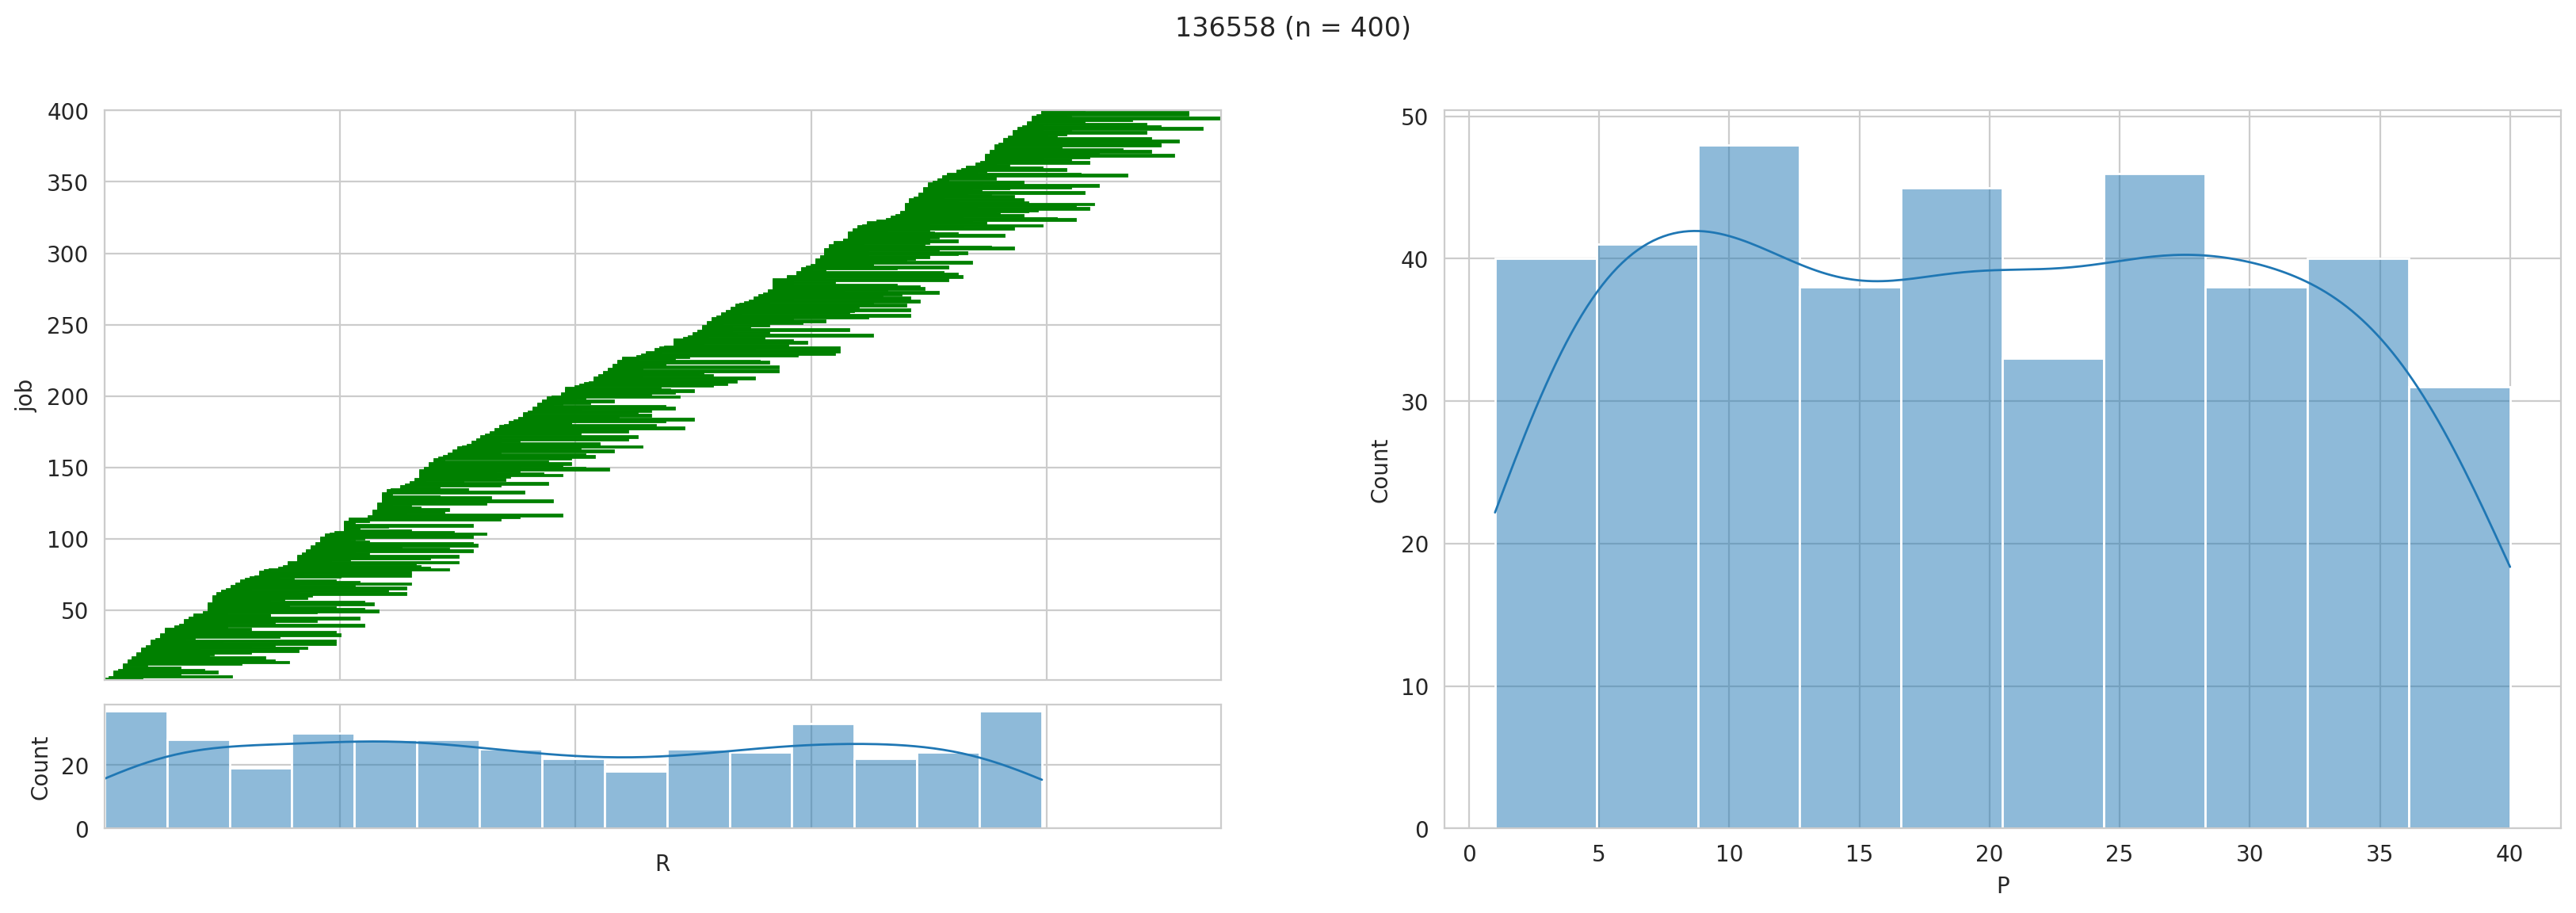

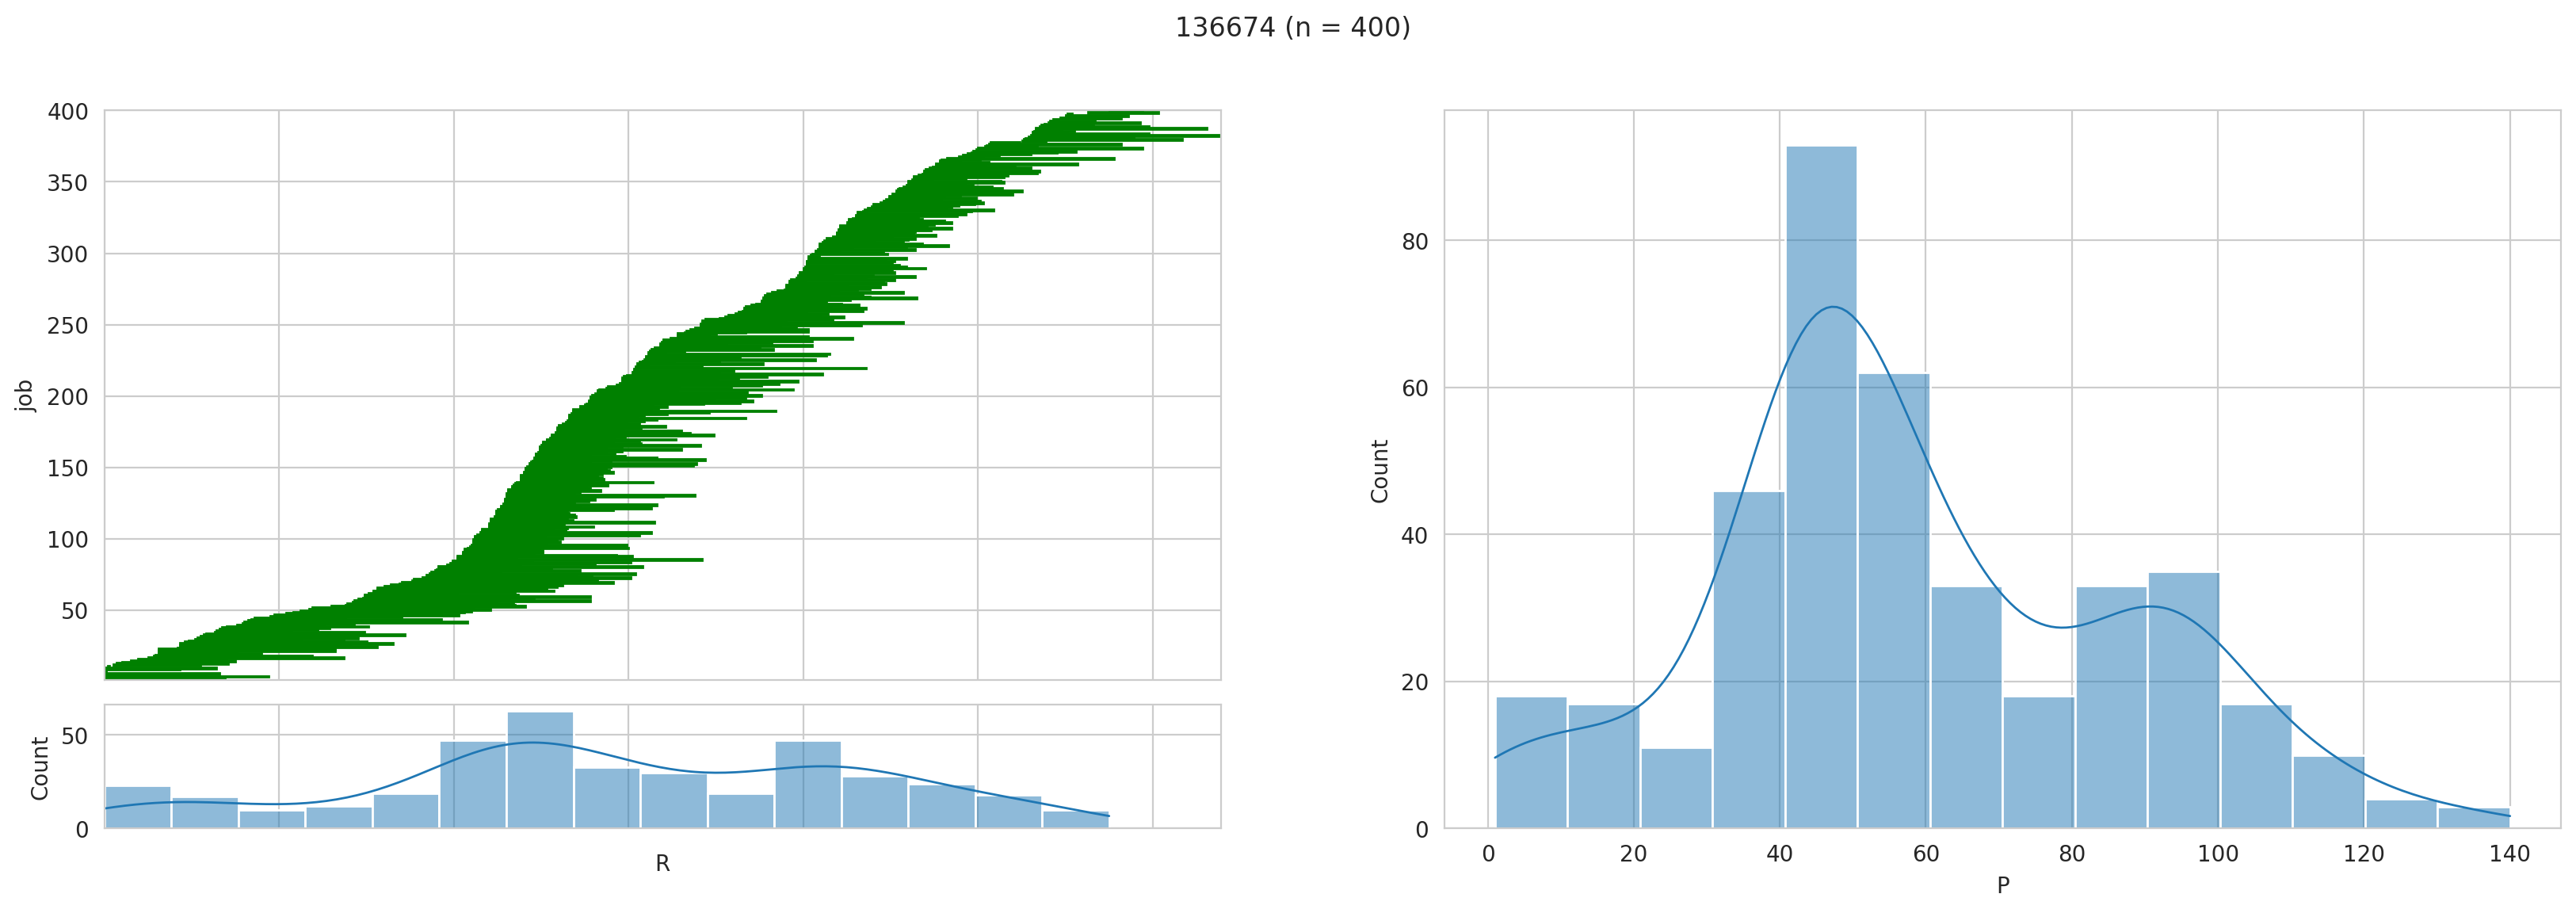

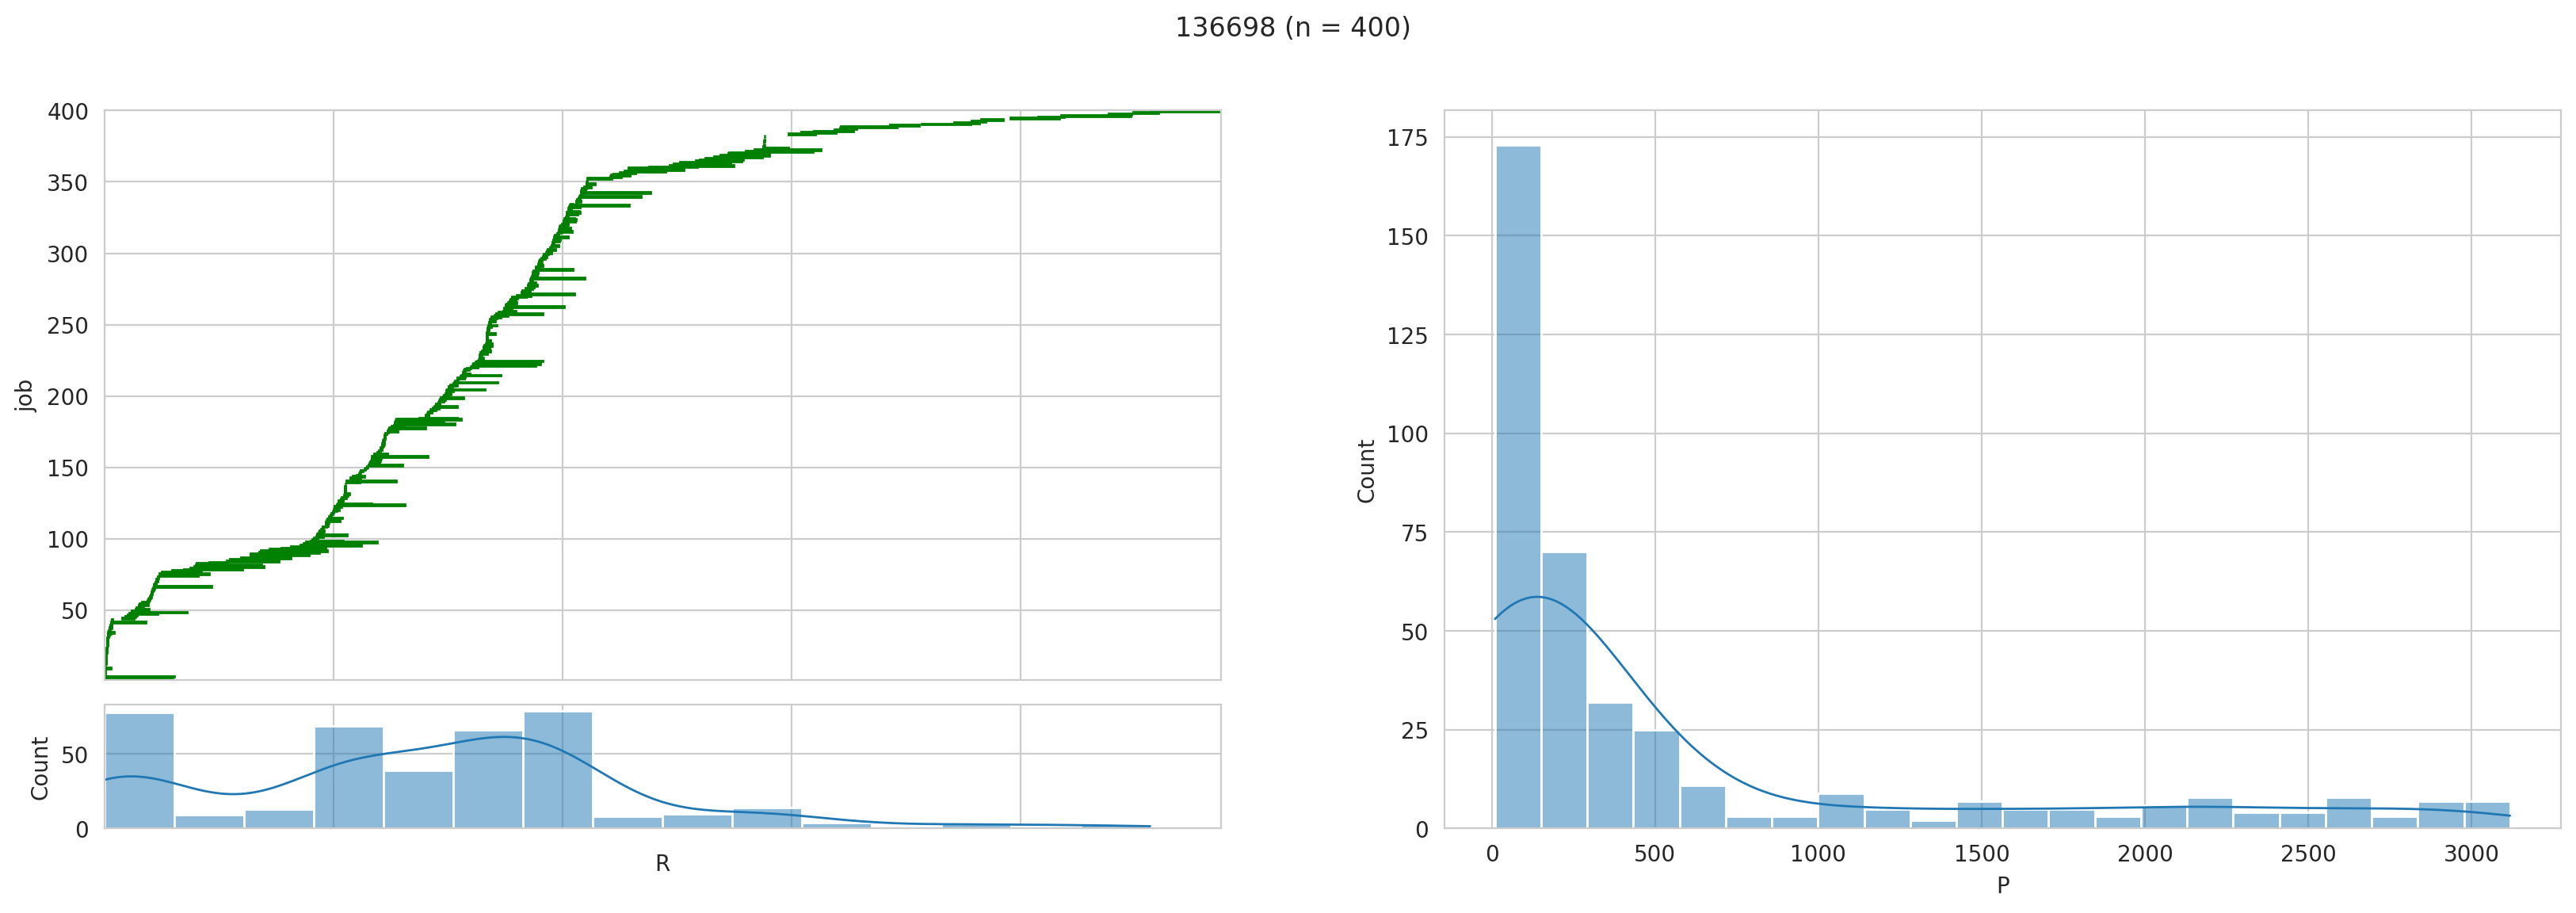

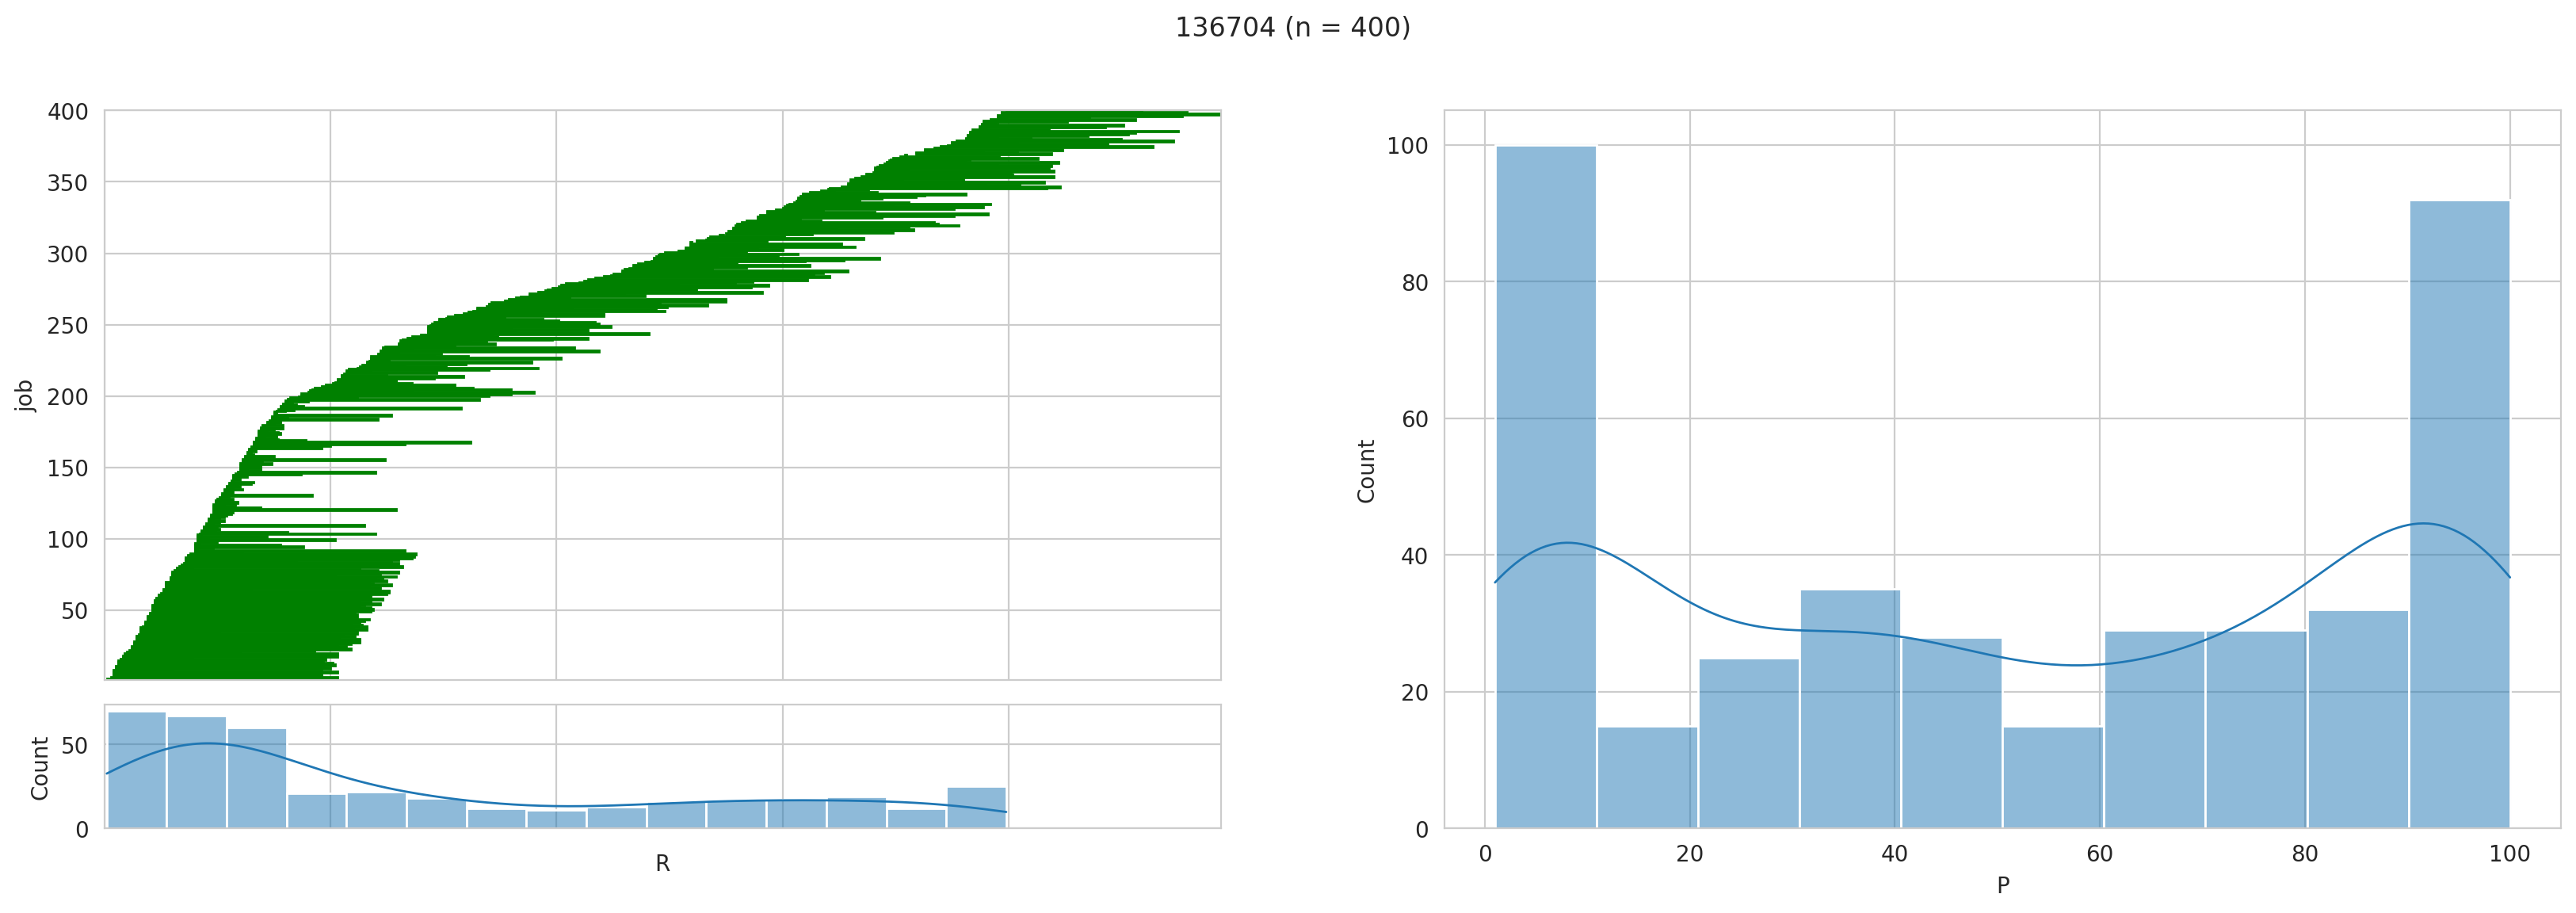

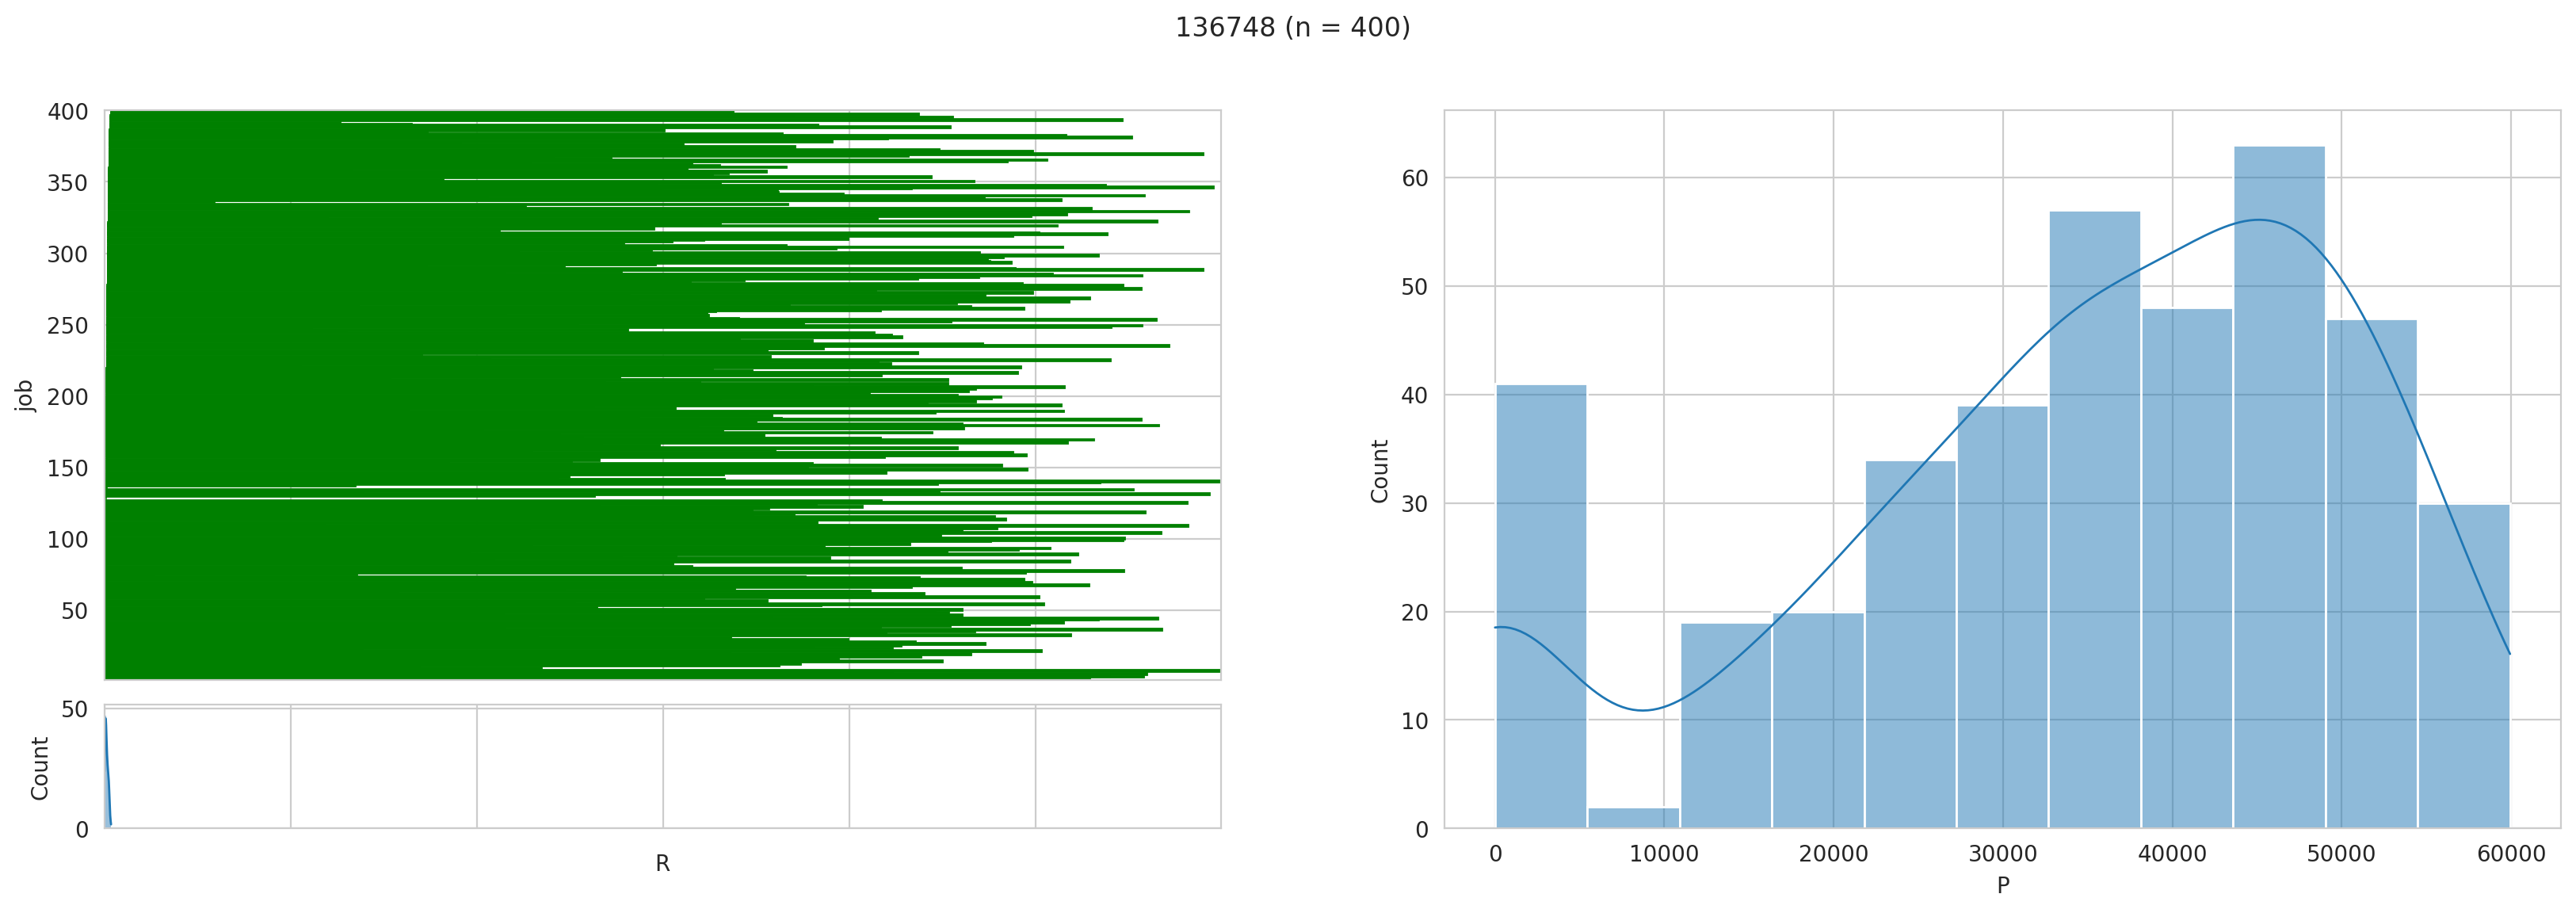

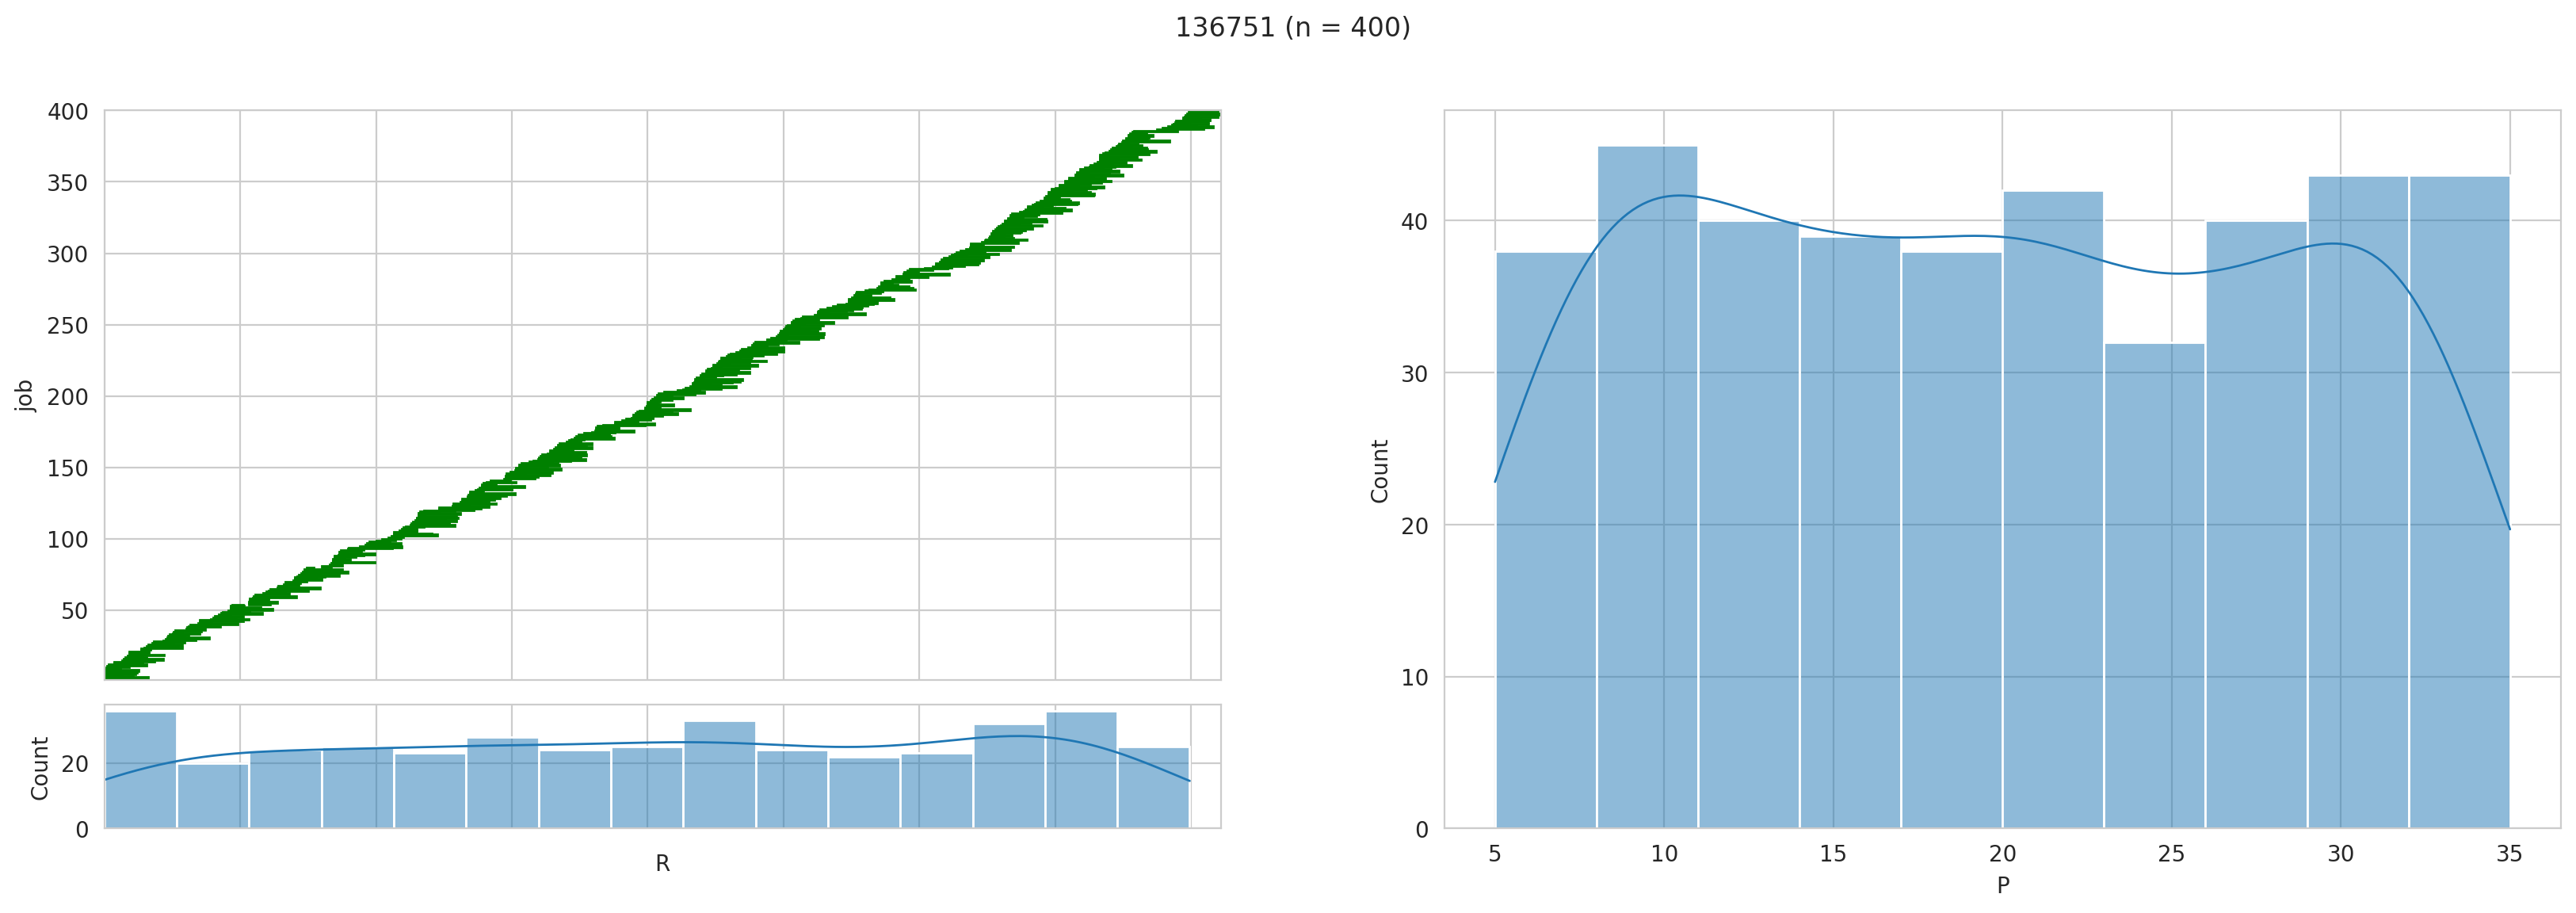

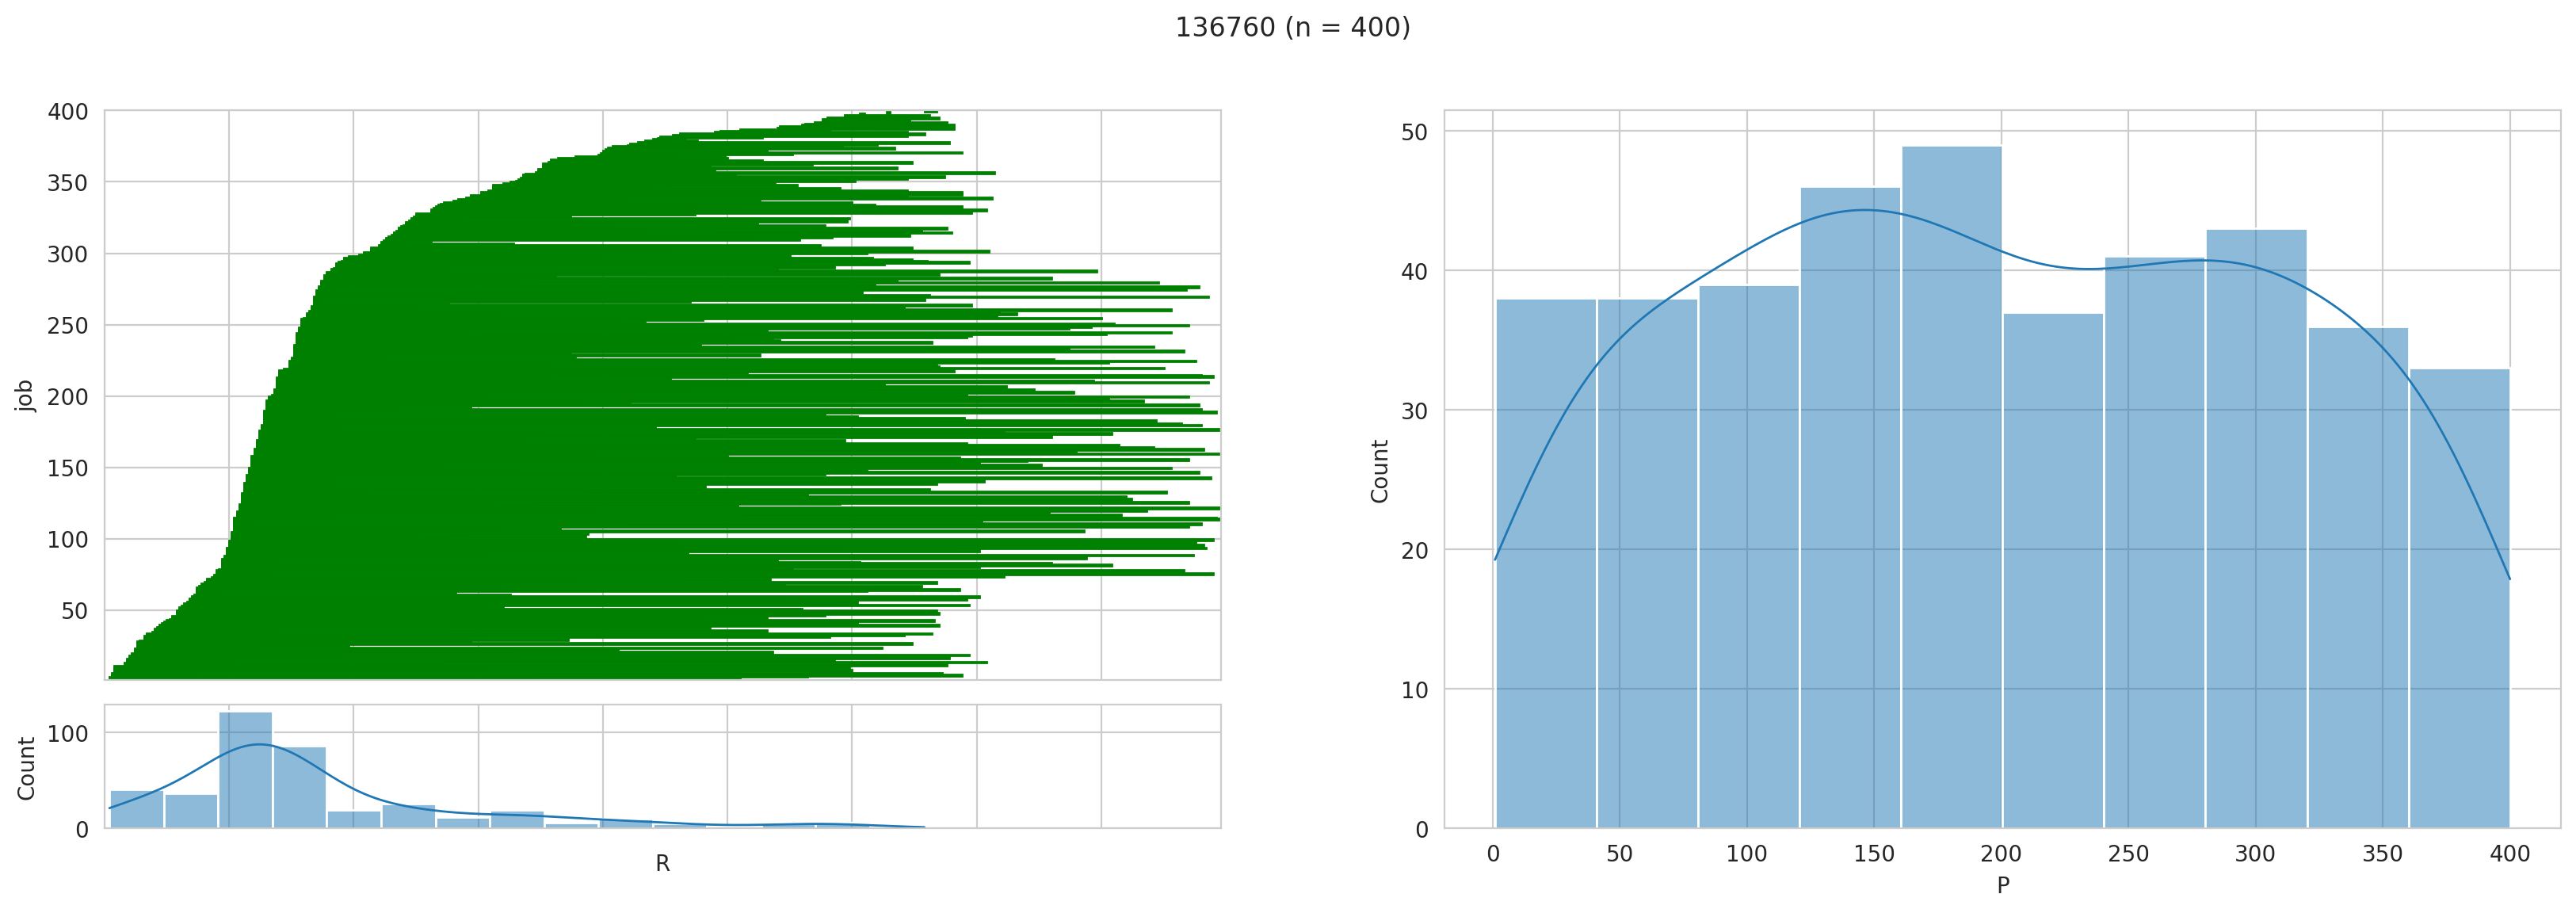

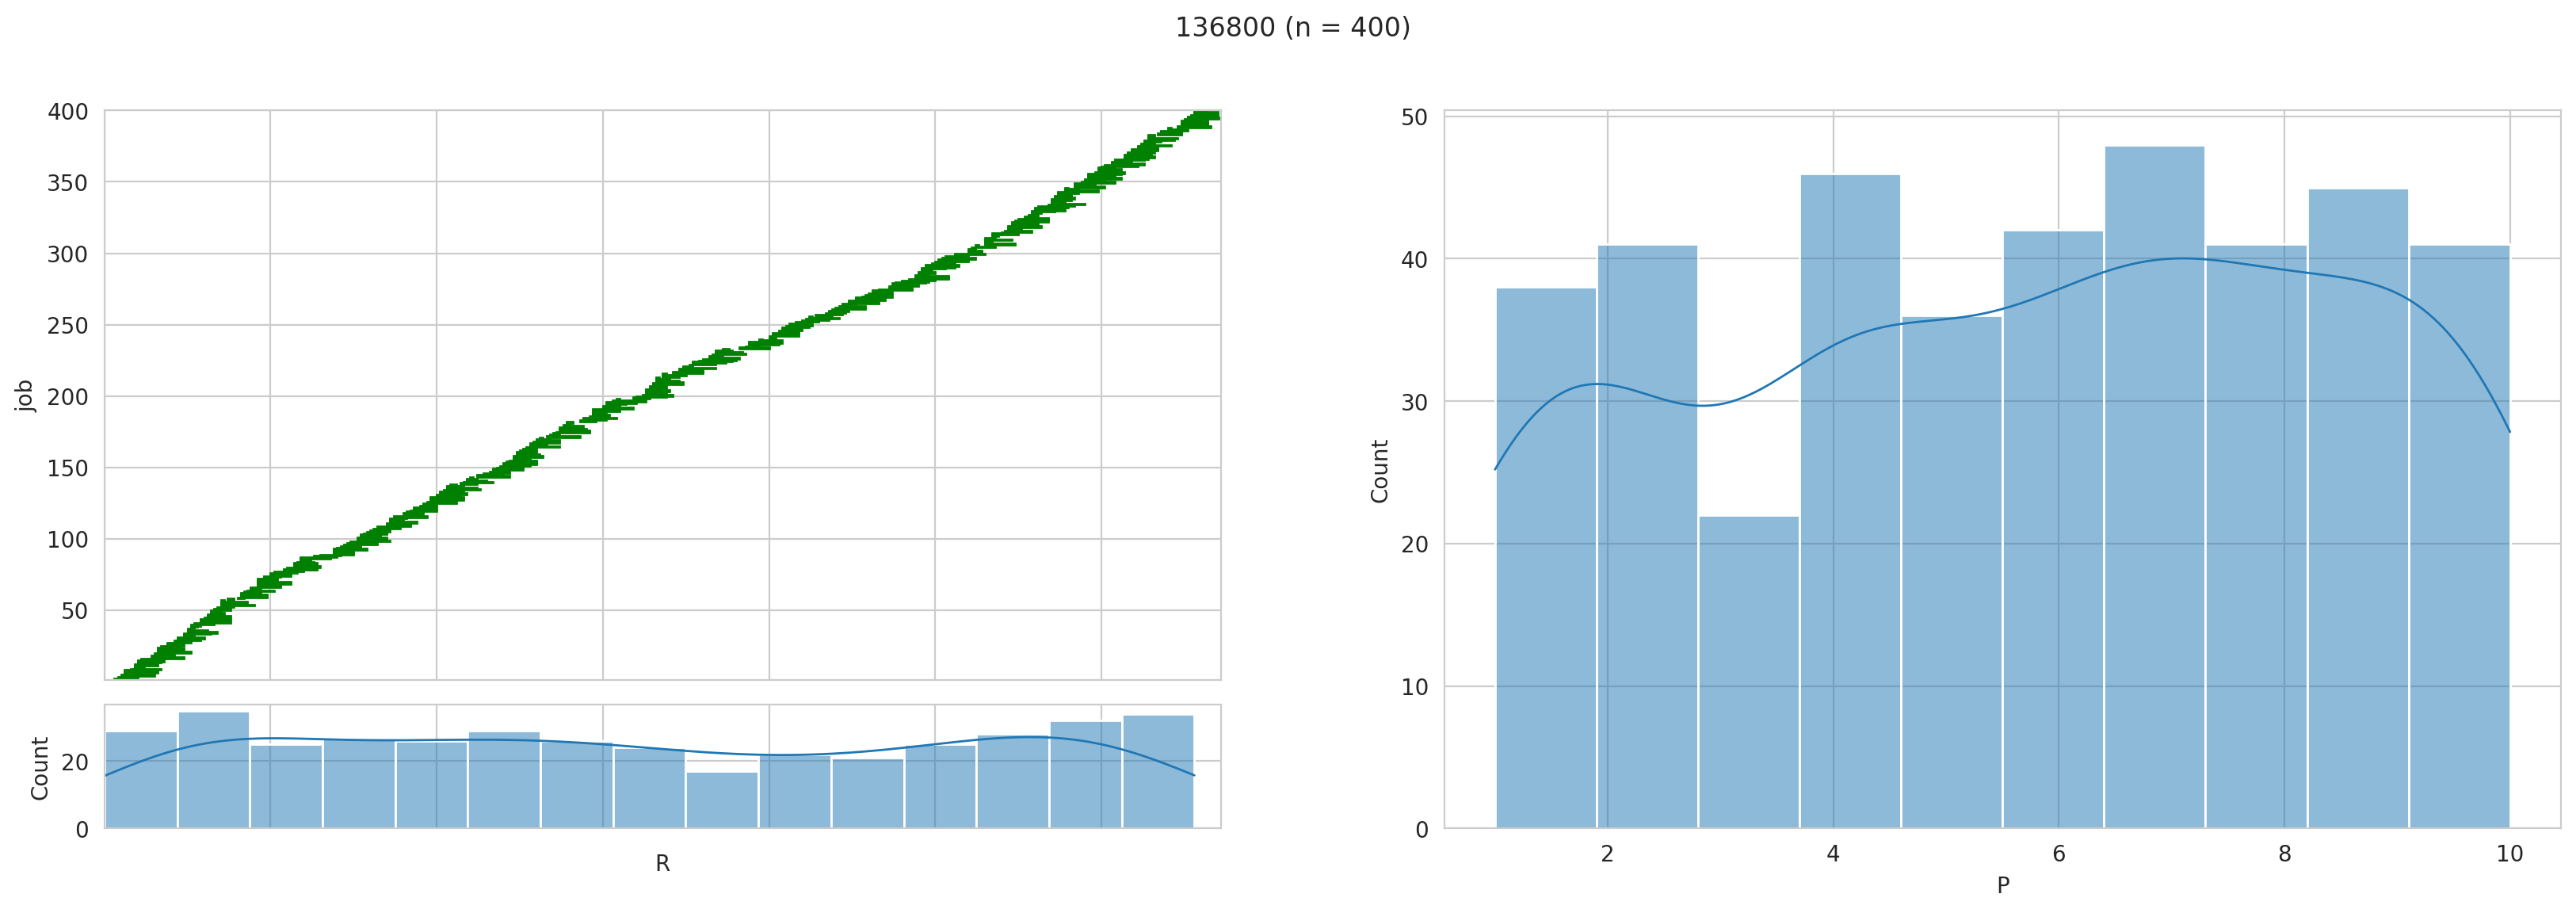

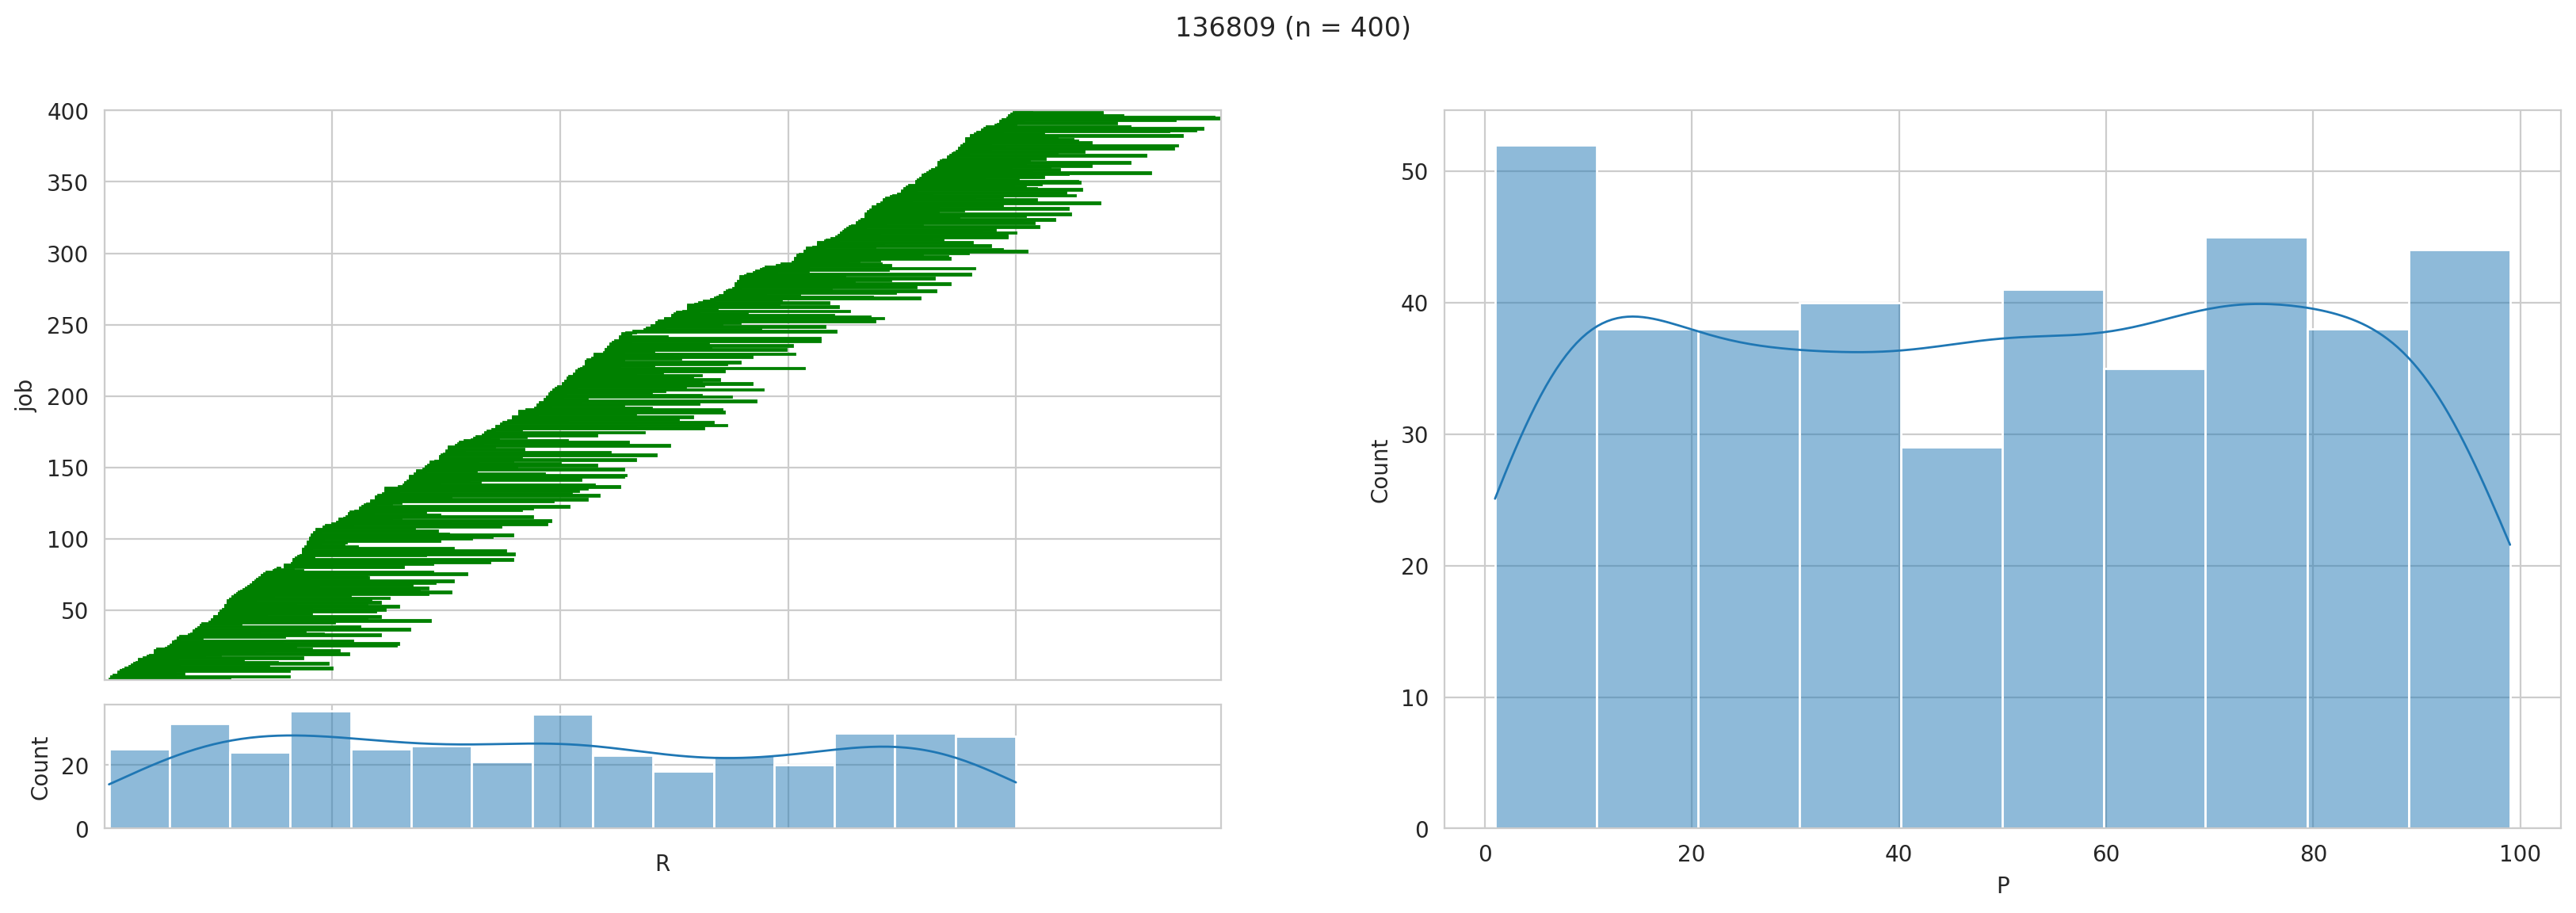

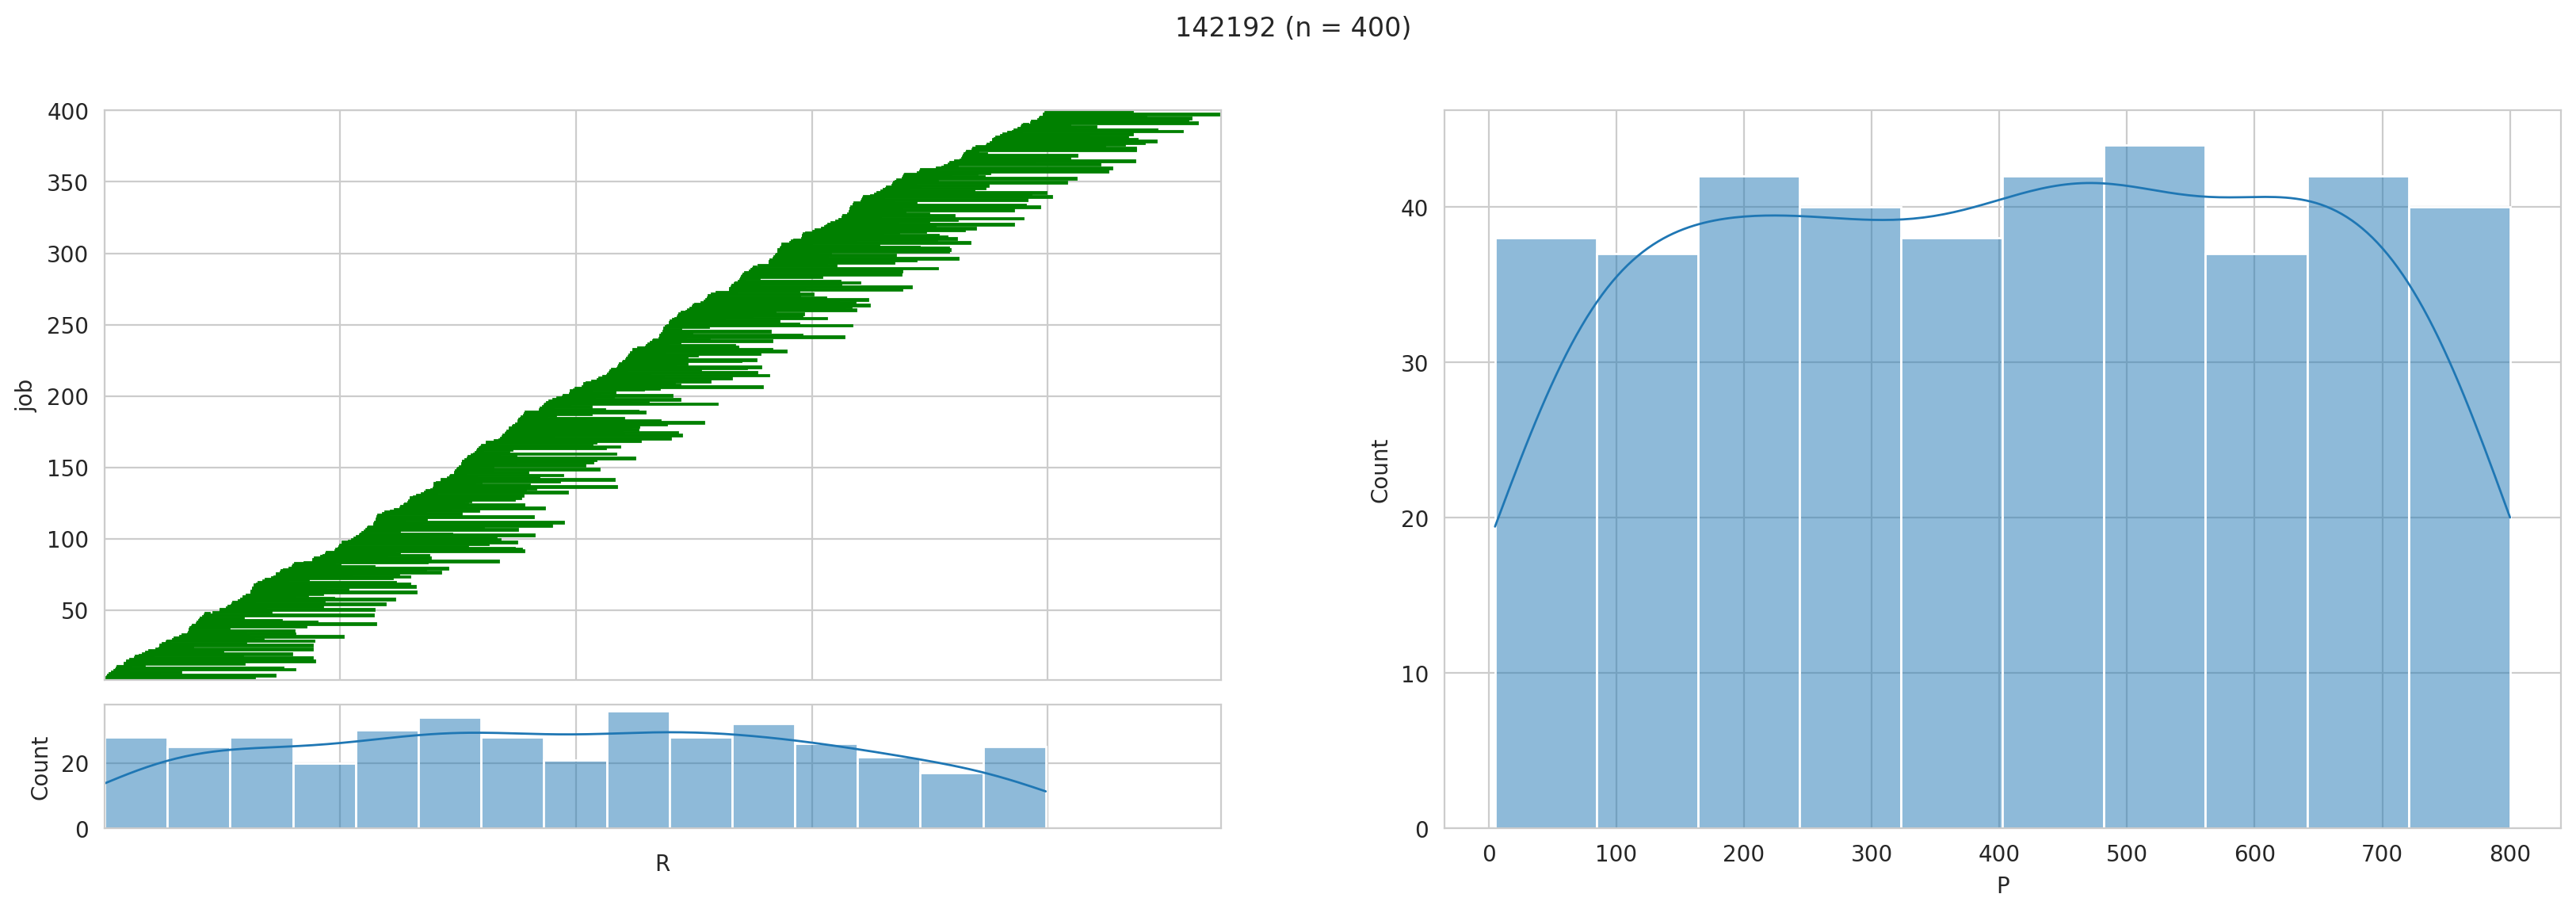

In [5]:
def plot_instance(B, P, R):
    gs = GridSpec(5, 2)
    fig = plt.figure(figsize=(20, 6), dpi=200)
    ax1 = fig.add_subplot(gs[:4, 0])
    ax2 = fig.add_subplot(gs[:, 1])
    ax3 = fig.add_subplot(gs[4, 0], sharex=ax1)
    
    N = len(P)
    J = np.argsort(R)
    for i, j in enumerate(J):
        p, r = P[j], R[j]
        ax1.add_patch(patches.Rectangle((r, i), p, 1, color='g'))
        
    ax1.set_ylim(1, N)
    ax1.set_xlim(0, np.max(R + P))
    ax1.set_ylabel('job')

    sns.histplot(P, kde=True, ax=ax2)
    ax2.set_xlabel('P')
    
    sns.histplot(R, bins=15, kde=True, ax=ax3)
    ax3.set_xlabel('R')
    
    ax1.set_xticklabels([])
    ax1.get_shared_x_axes().join(ax1, ax2)
    return fig
    
def readinstance(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        N = int(lines[0])
        B = np.array(list(map(float, lines[1].split())))
        P, R = np.array([list(map(int, x.split())) for x in lines[2:]]).T
        assert len(B) == 5, f'B must have 5 elements, but got {len(B)}'
        assert len(P) == N, f'P must have {N} elements, but got {len(P)}'
        return B, P, R

n = 400
ids = '132203 132325 136558 136674 136698 136704 136748 136751 136760 136800 136809 142192'.split(' ')
for id in ids:
    B, P, R = readinstance(f'../in/{id}/{id}_{n}.txt')
    fig = plot_instance(B, P, R)
    fig.suptitle(f'{id} (n = {n})')
    plt.show()